# Feature Explorations

In this notebook I diver deeper into the featuers chosen for my most successful model (model 14 from notebook `model6_lc`). 

I wish to inspect details like mean sales prices for the building grade and township categories.

In [2]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

# load data
codes = pd.read_csv('../EXTR_LookUp.csv')
df = pd.read_csv('../leana_m4', index_col=0)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,twnshp_24,twnshp_25,twnshp_26,z_twnshp_20,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,1,0,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,1.950743,-0.484802
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,1,0,0,-0.127128,-0.35385,-0.369899,-0.419483,1.973505,-0.512597,-0.484802


# Building Grade

We saw previously that building grade had a strong linear relationship with sale price and imporved our model significantly.  Let's visualise the average sales prices for each building grade.

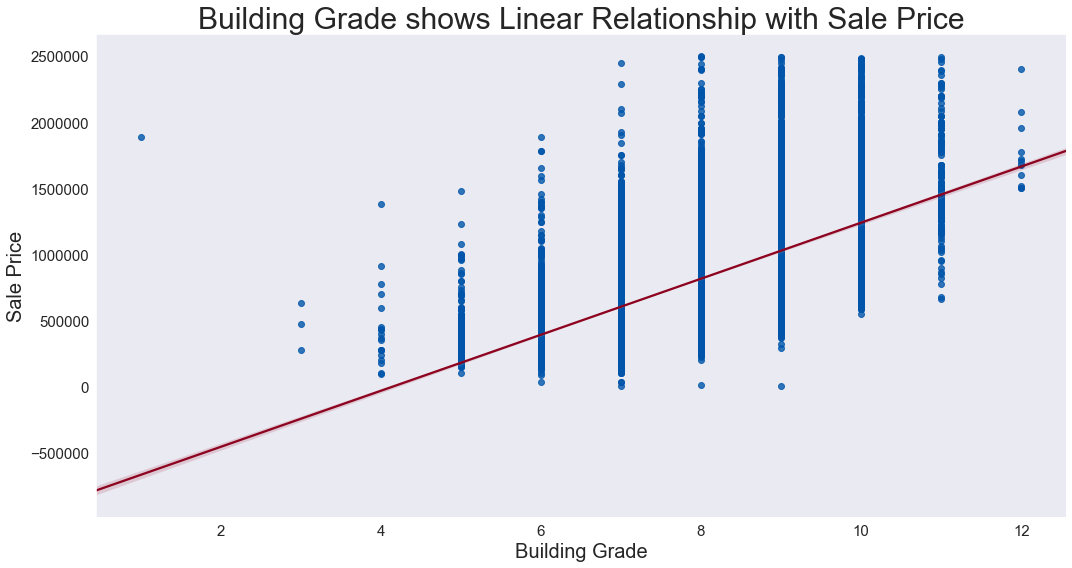

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'buildinggrade', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "#8D021F"});
ax.set_title('Building Grade shows Linear Relationship with Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Building Grade', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [4]:
df['buildinggrade'].unique()

array([ 8,  7,  6, 10,  9, 11,  5, 12,  4,  1,  3])

In [5]:
df['buildinggrade'] = df['buildinggrade'].astype('int')
df.buildinggrade.dtype

dtype('int64')

In [6]:
codes[codes['LUType'] == 82]['LUDescription']

1150    1  Cabin                                      ...
1151    10 Very Good                                  ...
1152    11 Excellent                                  ...
1153    12 Luxury                                     ...
1154    13 Mansion                                    ...
1155    2  Substandard                                ...
1156    Exceptional Properties                        ...
1157    3  Poor                                       ...
1158    4  Low                                        ...
1159    5  Fair                                       ...
1160    6  Low Average                                ...
1161    7  Average                                    ...
1162    8  Good                                       ...
1163    9  Better                                     ...
Name: LUDescription, dtype: object

In [7]:
# subset df to just saleprice and building grade
sale_bg_df = df.loc[:, ['saleprice', 'buildinggrade']]

In [8]:
# groupby building grade and find the mean sale price for each build grade
sale_bg_df.groupby(['buildinggrade']).mean()

,saleprice
buildinggrade,
1,1.890000e+06
3,4.611500e+05
4,4.440711e+05
5,4.086010e+05
6,4.648199e+05
7,5.890159e+05
8,7.640230e+05
9,1.067807e+06
10,1.362632e+06


### Visualise Average Sale Price per Building Grade

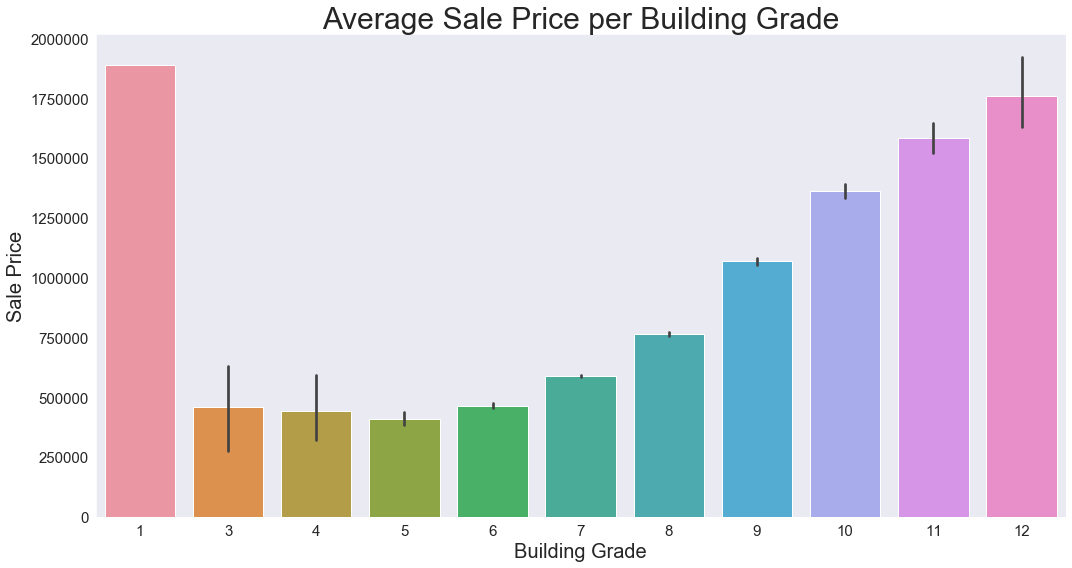

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="buildinggrade", y="saleprice", data=df)
ax.set_title('Average Sale Price per Building Grade', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Building Grade', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

This graph makes logical sense - obviously houses that are of poor build grade are going to be less than houses that are mansions.  What may be surprising is that cabins appear to have a higher average sale price than mansions do.  This is perhaps because a lot of cabins are on waterfront locations.  Also keep in mind that we have removed the substantially high-priced mansion houses from our data set.  Perhaps it would also be appropriate to remove cabins from our dataset since we are focusing on single family homes for first time home buyers and are making the assumptions that these buyers are buying their primary residence and not planning to live in a cabin.  Perhaps we could experiment with dropping cabins from our data set and running our model again without it.  

Let's also view the distribution of this data:

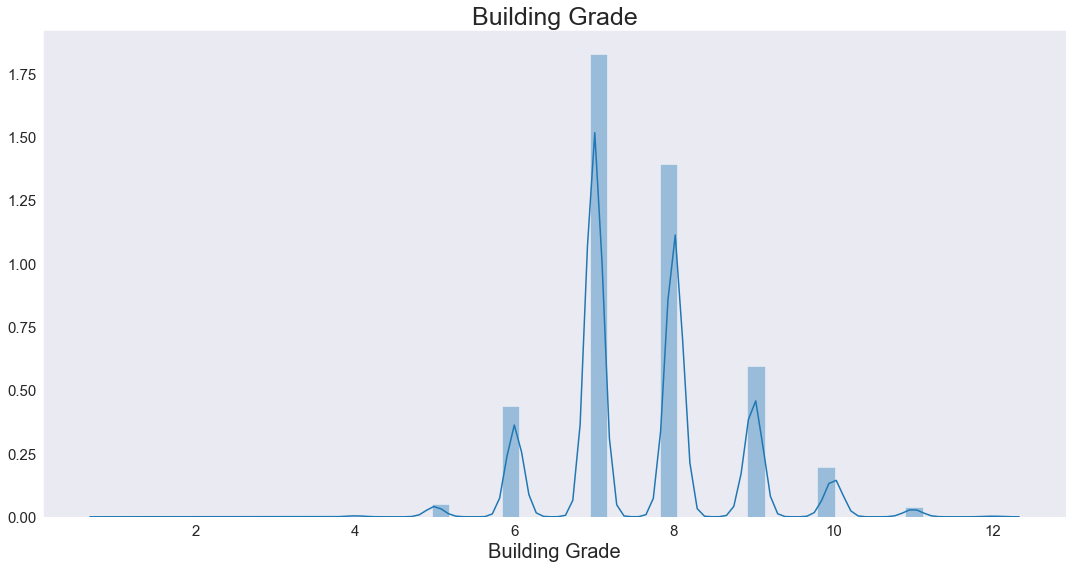

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Building Grade', fontsize = 25)
sns.distplot(df.buildinggrade, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Building Grade', fontsize = 20)
plt.tight_layout()

It looks quite normal.  We could compare to log transformed data:

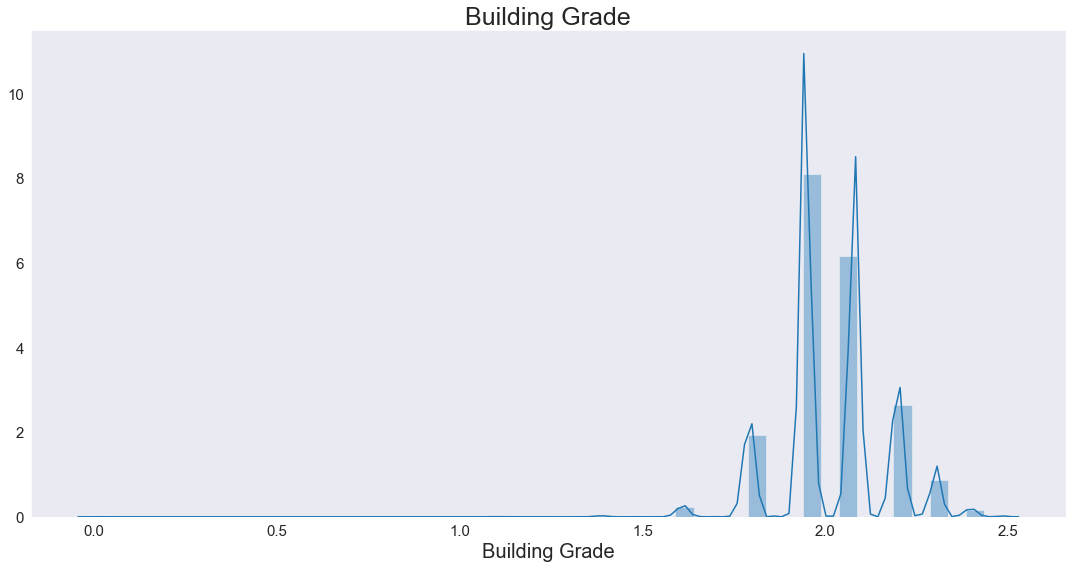

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Building Grade', fontsize = 25)
sns.distplot(np.log(df.buildinggrade), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Building Grade', fontsize = 20)
plt.tight_layout()

It looks much the same so I don't think we will need to worry about a log transform for this feature.  Although we will add a column to our dataframe in case we want to test it in our model.

In [112]:
new_df['log_buildinggrade'] = np.sqrt(new_df.buildinggrade)

# Township

We also saw previously that township had a strong linear relationship with sale price.  This makes intuitive sense since house values are very much determined by location.  

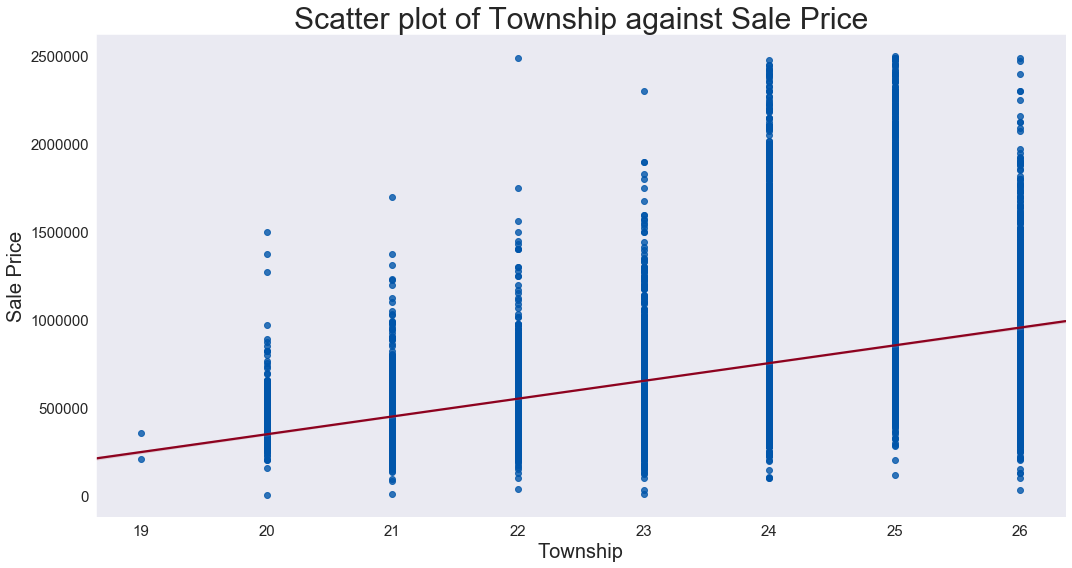

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'township', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "#8D021F"});
ax.set_title('Scatter plot of Township against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Township', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [11]:
df.township.dtype

dtype('int64')

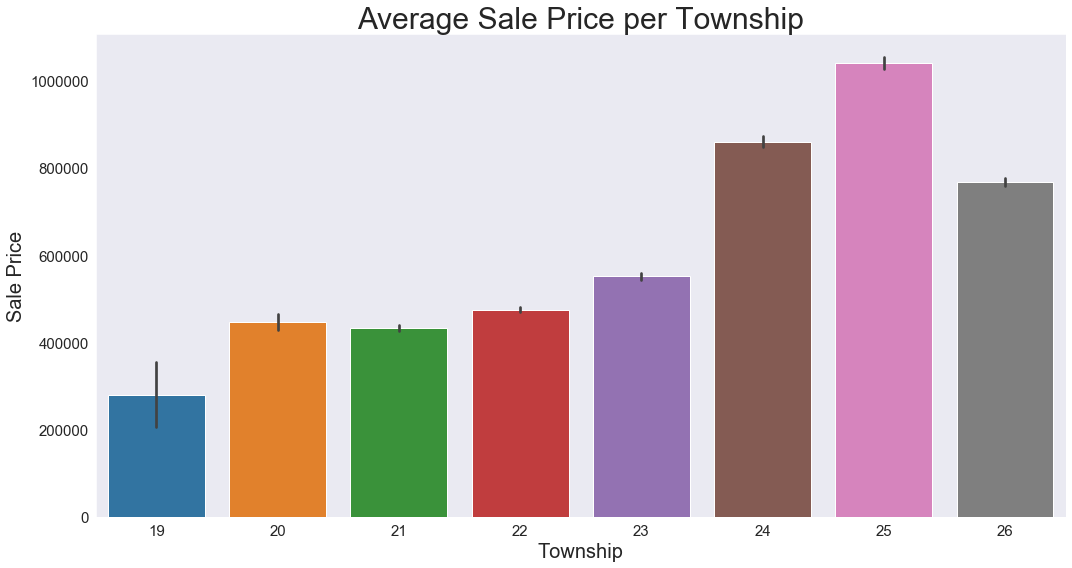

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="township", y="saleprice", data=df)
ax.set_title('Average Sale Price per Township', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Township', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

So, we can see that township 25 has the higest average sales price.  This township would be bringing up the overall average sale price of King County.  Townships 20, 21, 22 all show similar average prices.  Interestingly, these were the townships that showed higher p-values for their coefficients in the models, suggesting that there isn't significant evidence that these townships affect sale price.  This now makes sense as we can see here that the sale price is dominated by townships 24-26 (and arguably township 19).  

Let's again inspect the distribution of this data:

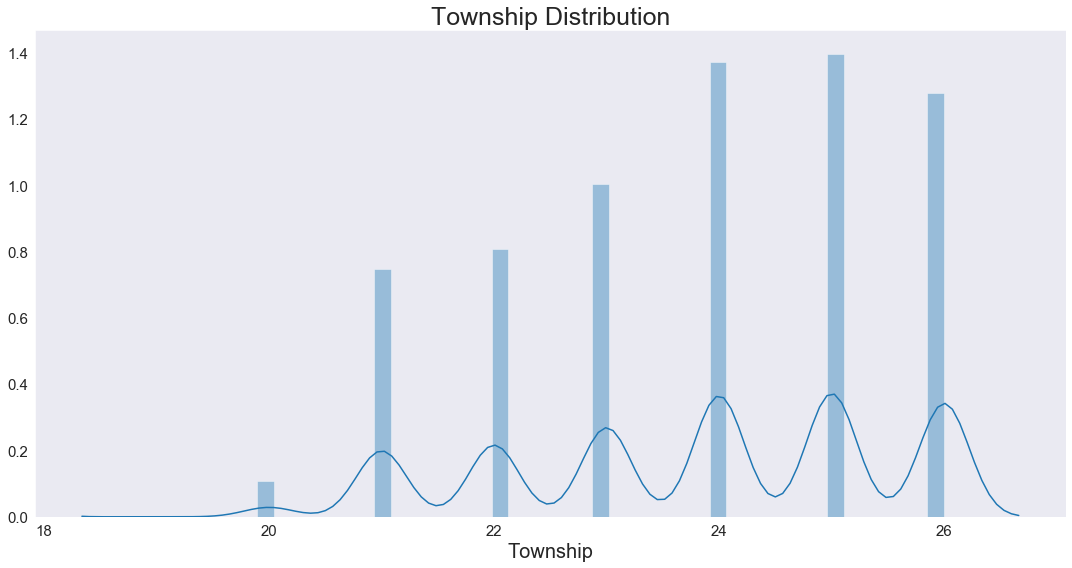

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Township Distribution', fontsize = 25)
sns.distplot(df.township, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Township', fontsize = 20)
plt.tight_layout()

It doesn't look very normal.  Let's try log transforming it.

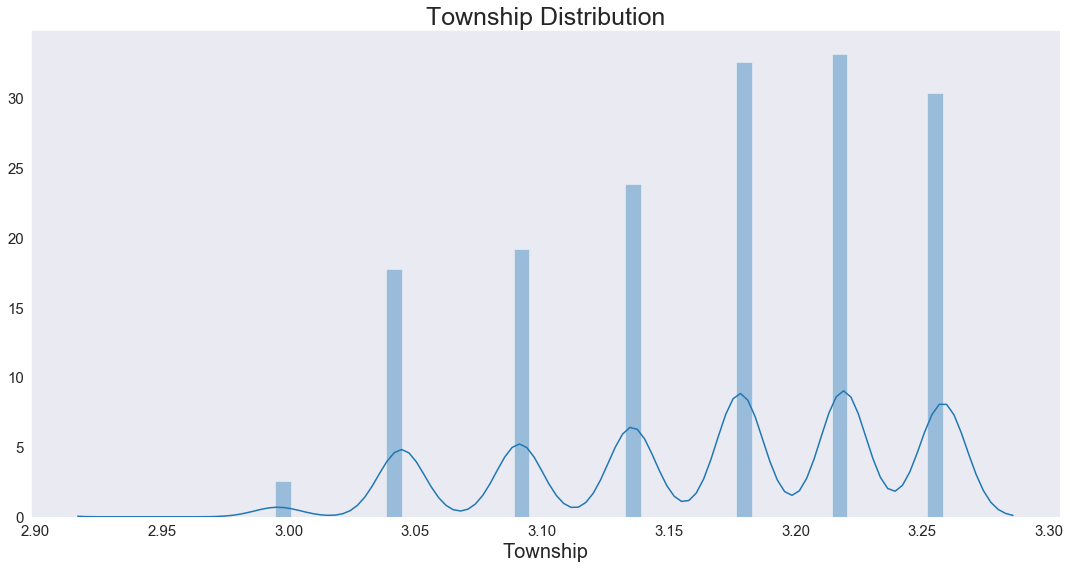

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Township Distribution', fontsize = 25)
sns.distplot(np.log(df.township), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Township', fontsize = 20)
plt.tight_layout()

That didn't help a great deal as expected since it is a categorical variable.  Again, we won't worry about using a log transformed variable in our model for this feature.

# Total Living Square Footage

We start this investigating by looking at the relationship between total living square footage and sale price.  We can see there is a fair strong linear relationship here.

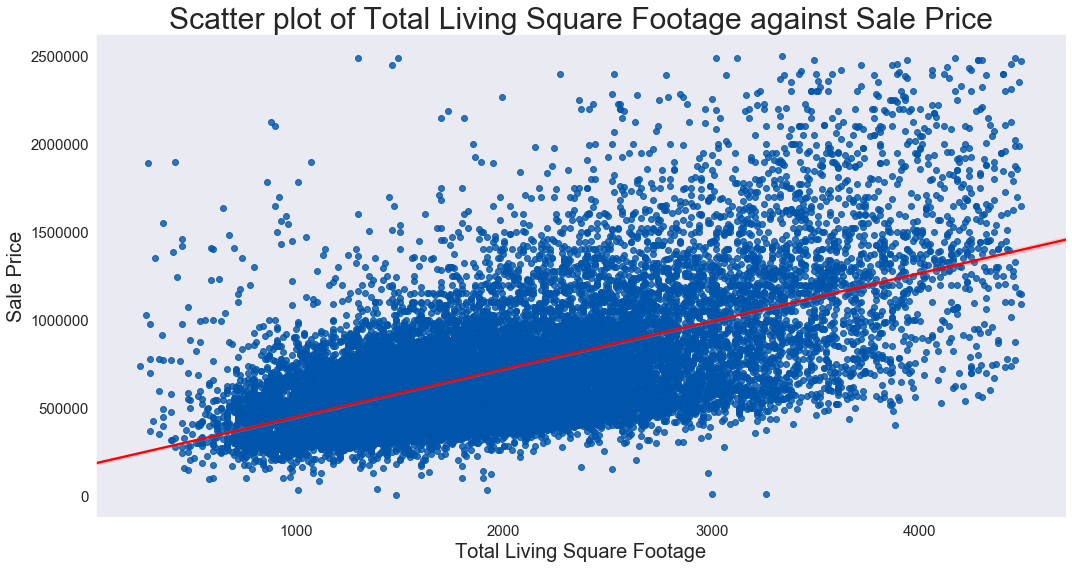

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeettotalliving', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Total Living Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Total Living Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

Below, when investigating porch size, I found a significant outlier which I decided to remove from the data frame.  I'd like to compare the impact of taking this outlier out on the total square living again sale price.

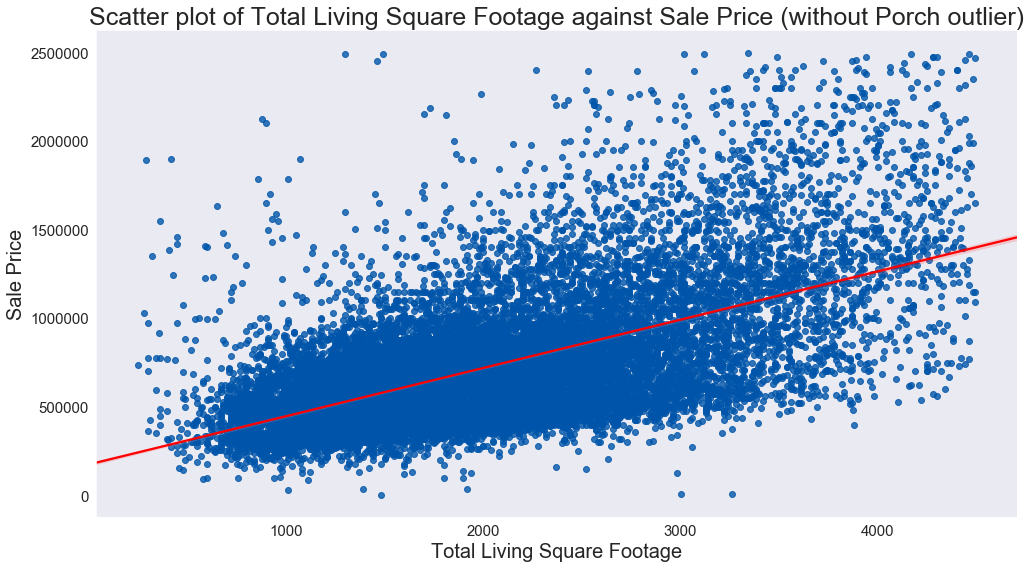

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeettotalliving', y = 'saleprice', data = new_df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Total Living Square Footage against Sale Price (without Porch outlier)', fontsize = 25)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Total Living Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

It is very much the same, but perhaps a better fit. **I'll need to rerun my models with this data**

This leads us to investigate whether the square footage of the porches and decks might have a relationship with sale price.

Inspect distribution:

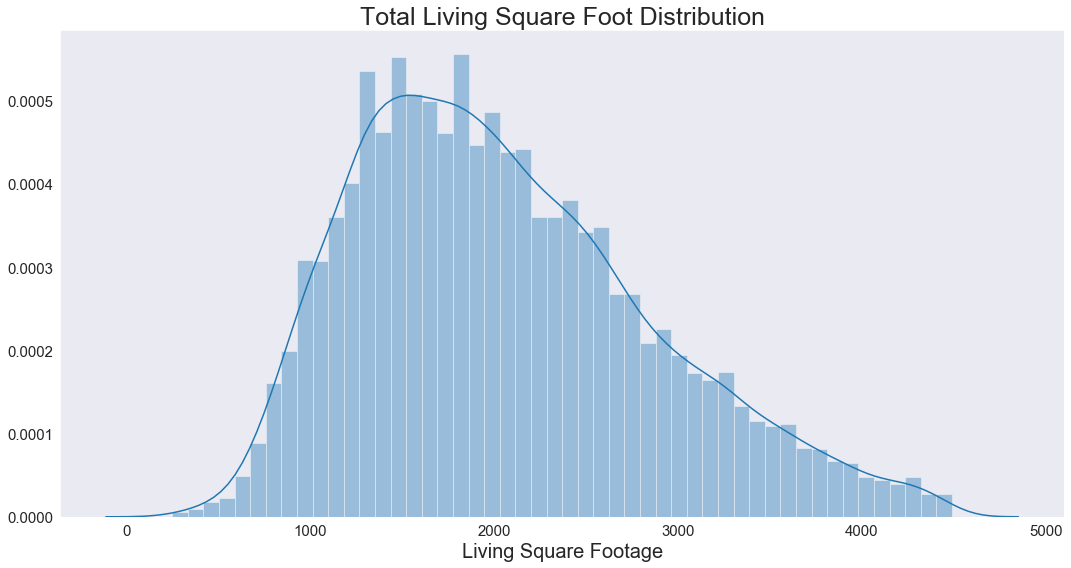

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(df.squarefeettotalliving, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

This looks quite normal with a bit of right skew.  Let's see how a log transform would help:

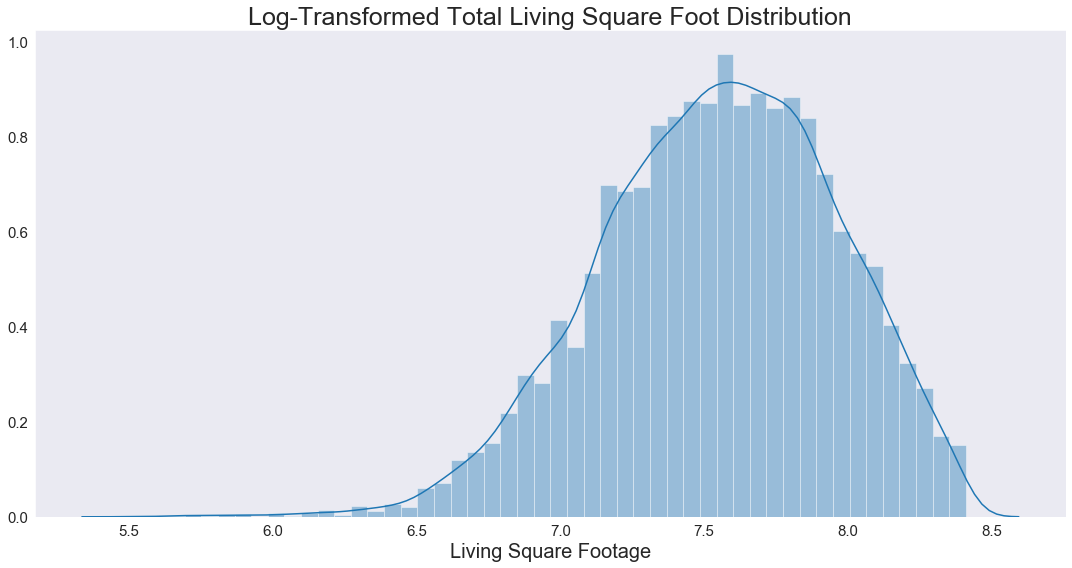

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Log-Transformed Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(np.log(df.squarefeettotalliving), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

This appears to have skewed it to the right now, so move up the ladder of powers slightly and try a square root transformation:

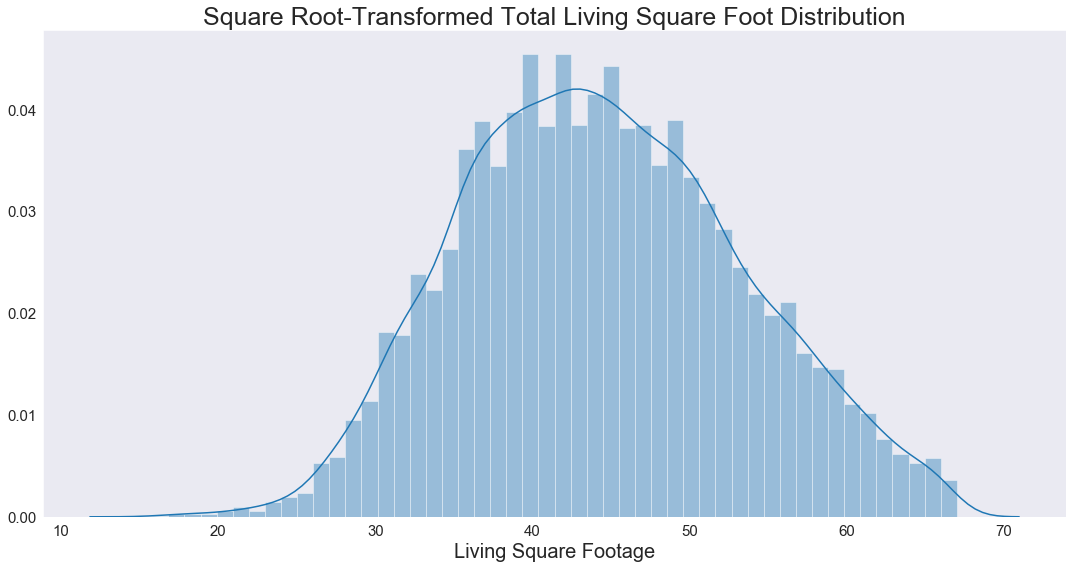

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square Root-Transformed Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(np.sqrt(df.squarefeettotalliving), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

The square root transformation of the data made this quite normal.  Let's use this data in the model next time.  I'm going to add a column of square root data for total square living to use later. 

In [71]:
new_df['sqrt_totlivingsqft'] = np.sqrt(new_df.squarefeettotalliving)

# Porch Square Footage

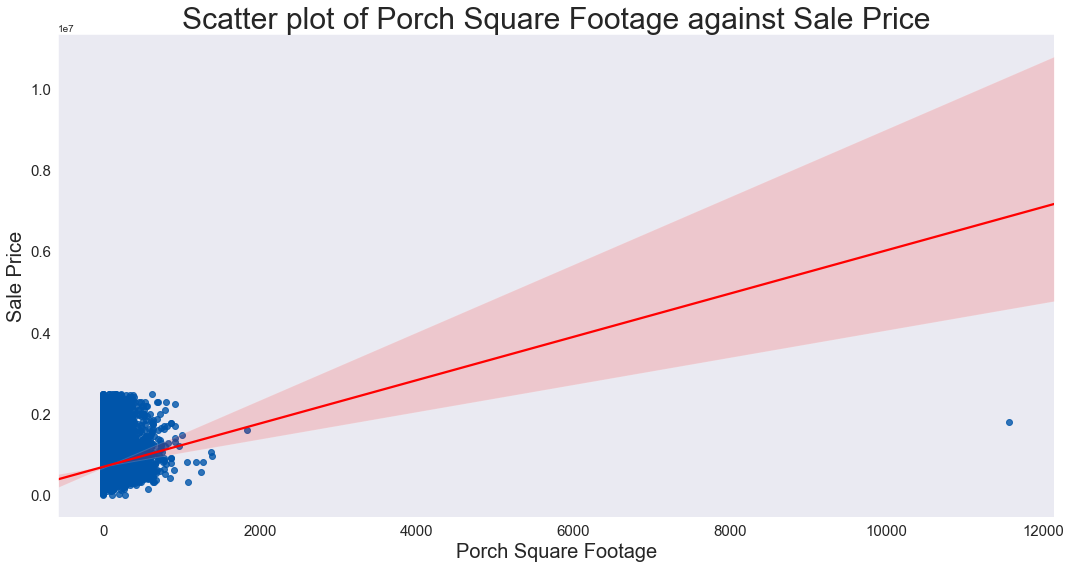

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'sqftporch', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Porch Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

Here, we can see there appears to be one major outlier.  It would probably make sense to remove this entry.  

In [16]:
df['sqftporch'].unique()

array([   90,    50,     0,    60,   135,   130,   180,   270,    30,
         290,   150,    40,    80,   199,   100,   140,   320,   120,
          70,   160,   170,    76,   110,   190,   240,   200,   280,
         340,   500,   260,   540,   360,    55,   300,   210,   220,
         250,    96,   310,   330,    20,   273,   230,   192,   370,
         241,   350,   282,   420,   440,    36,   700,   206,   216,
         720,   214,   530,   104,   450,   400,   570,   102,   610,
         436,   510,   142,   780,   396,   203,   470,   228,   390,
         416,    56,   112,   490,   430,   590,   410,   108,   690,
         225,   304,   126,    10,   532,    72,   366,    86,    49,
          88,    25,   380,   810,   215,  1080,    24,   560,    15,
         480,    78,   201,    94,    48,   460,   212,   238,   157,
          95,   630,   213,   242,   323,   362,   520,   217,   740,
         255,   128,    98,   188,    54,   600,    42,    84,   580,
         252,   222,

In [17]:
df['sqftporch'].max()

11570

It seems unlikely that someone has a porch that is 11,570sqft.  Perhaps it was entered wrong and is meant to be 1157 sqft porch.  But to be safe, we will remove this entry from our dataframe.  It does have a high sale price but unproportionately so.

In [18]:
df[df['sqftporch'] == 11570]

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,twnshp_24,twnshp_25,twnshp_26,z_twnshp_20,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26
8916,2019-12-23,1800000.0,11,6,3,N,N,1,8,98045.0,...,0,0,0,-0.127128,-0.35385,-0.369899,2.383756,-0.506685,-0.512597,-0.484802


In [19]:
new_df = df.drop(8916, axis = 0)

I will re-run my visualisations above to see if this has affected the data significantly.

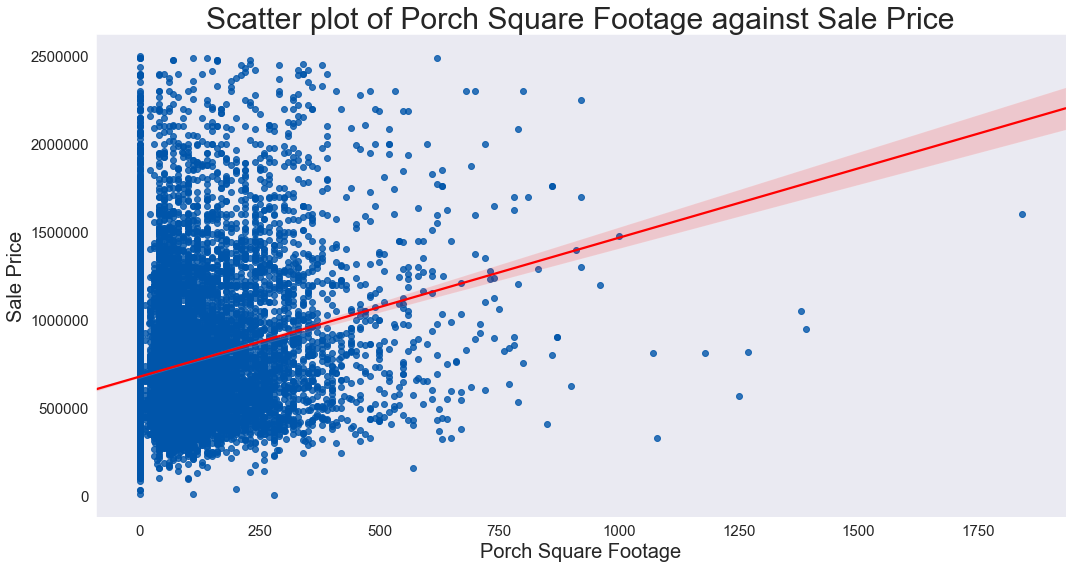

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'sqftporch', y = 'saleprice', data = new_df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Porch Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

This has imporved the fit significantly and there seems to be a mild linear relationship here between porch size and sale price however it's hard to tell be cause I've now noticed that we have plotted the 'no porch' data here as well which will be throwing off the data.

First, let's get an idea of the average sale price of a house with a porch and without a porch.

In [22]:
new_df['has_porch'] = np.where(new_df['sqftporch'] > 0, 'yes', 'no')

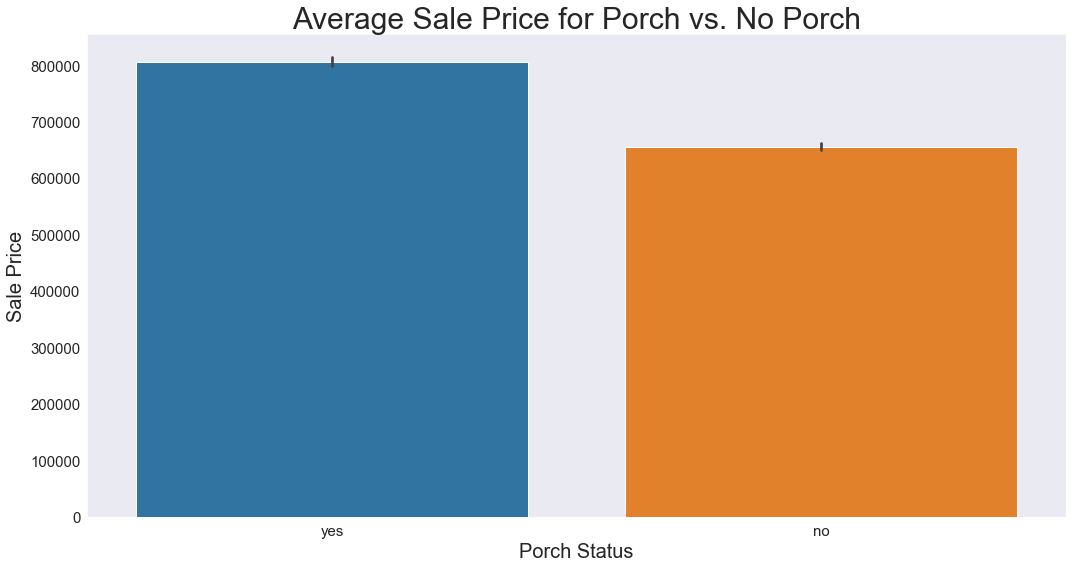

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = "has_porch", y = "saleprice", data = new_df)
ax.set_title('Average Sale Price for Porch vs. No Porch', fontsize = 30)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Status', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [26]:
new_df.groupby(['has_porch'])['saleprice'].mean()

has_porch
no     655895.124330
yes    805994.570836
Name: saleprice, dtype: float64

So, we can see that houses with porches do have a higher average sale price.  The average sale price for a house with a porch is \$805,994$ dollars and with out a porch is $655,895$ dollars

In [27]:
def linear_plt(x, y, df):
    fig, ax = plt.subplots(figsize=(15,8))
    sns.regplot(x = x, y = y, 
                data = new_df, 
                scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
    ax.set_title(f'Scatter plot of {x} against {y}', fontsize = 30)
    ax.tick_params(axis='both', labelsize=15)
    plt.xlabel(f'{x}', fontsize = 20)
    plt.ylabel(f'{y}', fontsize = 20)
    plt.tight_layout()
    
    return plt.show()

In [32]:
new_df['has_porch_sf'] = np.where(new_df['sqftporch'] > 0, new_df['sqftporch'], None)

In [34]:
new_df.drop('has_porch_sf', axis = 1, inplace = True)

In [35]:
has_porch_sf_df = new_df[new_df['sqftporch'] > 0]

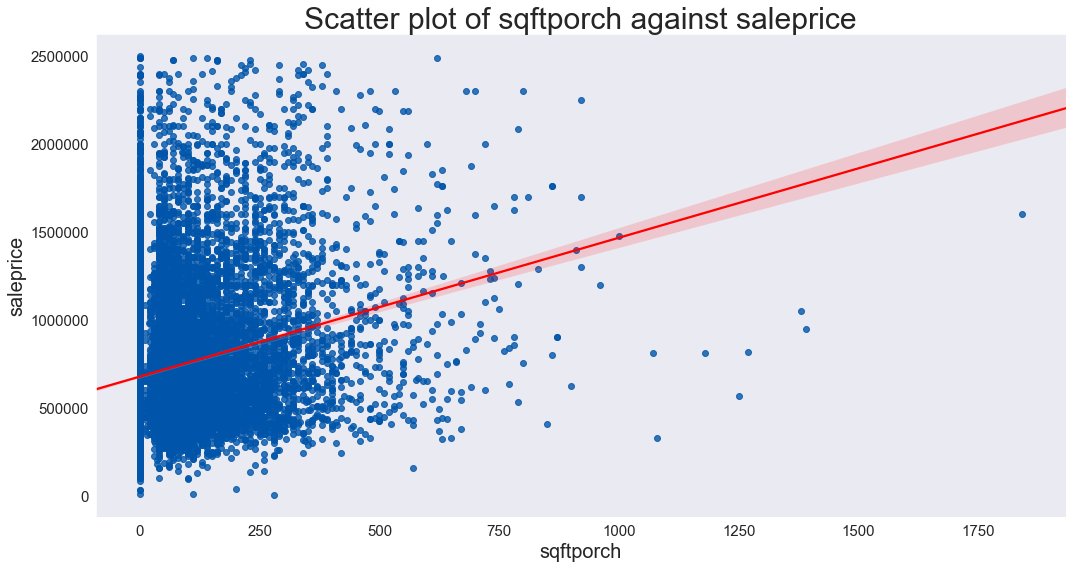

In [36]:
linear_plt('sqftporch', 'saleprice', has_porch_sf_df)

In [39]:
has_porch_sf_df.sqftporch.unique()

array([  90,   50,   60,  135,  130,  180,  270,   30,  290,  150,   40,
         80,  199,  100,  140,  320,  120,   70,  160,  170,   76,  110,
        190,  240,  200,  280,  340,  500,  260,  540,  360,   55,  300,
        210,  220,  250,   96,  310,  330,   20,  273,  230,  192,  370,
        241,  350,  282,  420,  440,   36,  700,  206,  216,  720,  214,
        530,  104,  450,  400,  570,  102,  610,  436,  510,  142,  780,
        396,  203,  470,  228,  390,  416,   56,  112,  490,  430,  590,
        410,  108,  690,  225,  304,  126,   10,  532,   72,  366,   86,
         49,   88,   25,  380,  810,  215, 1080,   24,  560,   15,  480,
         78,  201,   94,   48,  460,  212,  238,  157,   95,  630,  213,
        242,  323,  362,  520,  217,  740,  255,  128,   98,  188,   54,
        600,   42,   84,  580,  252,  222,   32,  144,   64,  620,  860,
        168,  254, 1000,  710,  269,   35,   65,  444,  550,  175,  174,
        176,  286,  316,  303,  509,  236,   66,  2

In [51]:
has_porch_sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9402 entries, 0 to 18169
Columns: 123 entries, documentdate to z_twnshp_26
dtypes: float64(53), int64(59), object(11)
memory usage: 8.9+ MB


In [42]:
new_df[new_df['sqftporch'] == 0].count()

documentdate      8767
saleprice         8767
propertytype      8767
principaluse      8767
saleinstrument    8767
                  ... 
z_twnshp_22       8767
z_twnshp_23       8767
z_twnshp_24       8767
z_twnshp_25       8767
z_twnshp_26       8767
Length: 123, dtype: int64

So there are 8767 homes without a porch.  Even when we take them our of the dataframe, the linear relationship isn't any better since we still have small porches that are 6sqft for example.  

Let's visualise the distribution of the sqft porch data:

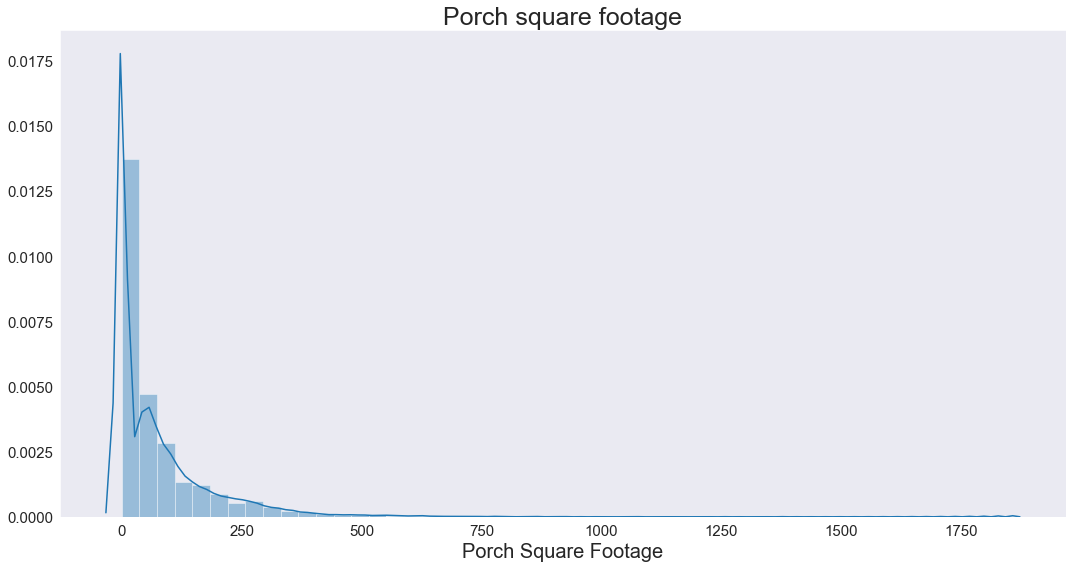

In [61]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Porch square footage', fontsize = 25)
sns.distplot(new_df.sqftporch, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.tight_layout()

This data is quite skewed.  I wonder if our model would be improved if we log transformed our data:

Log won't be able to deal with our 0 valued porches so we will changes these values so instead, we will do a square root transformation.

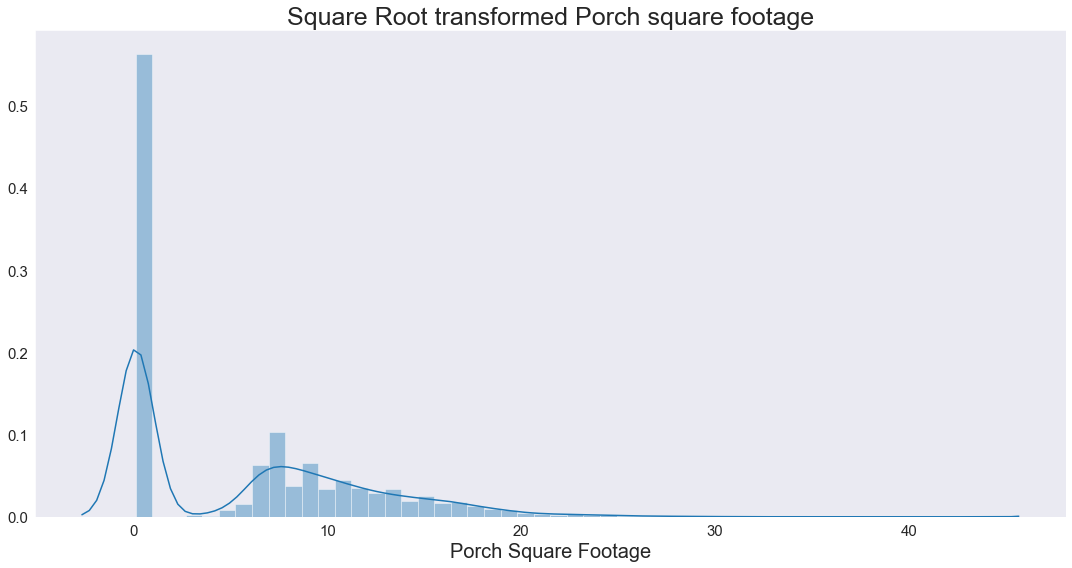

In [102]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square Root transformed Porch square footage', fontsize = 25)
sns.distplot(np.sqrt(new_df.sqftporch), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.tight_layout()

This does make the main bulk of our porch data more normal however the '0'sqft porch values are throwing this out.

What about without no porch values at all:

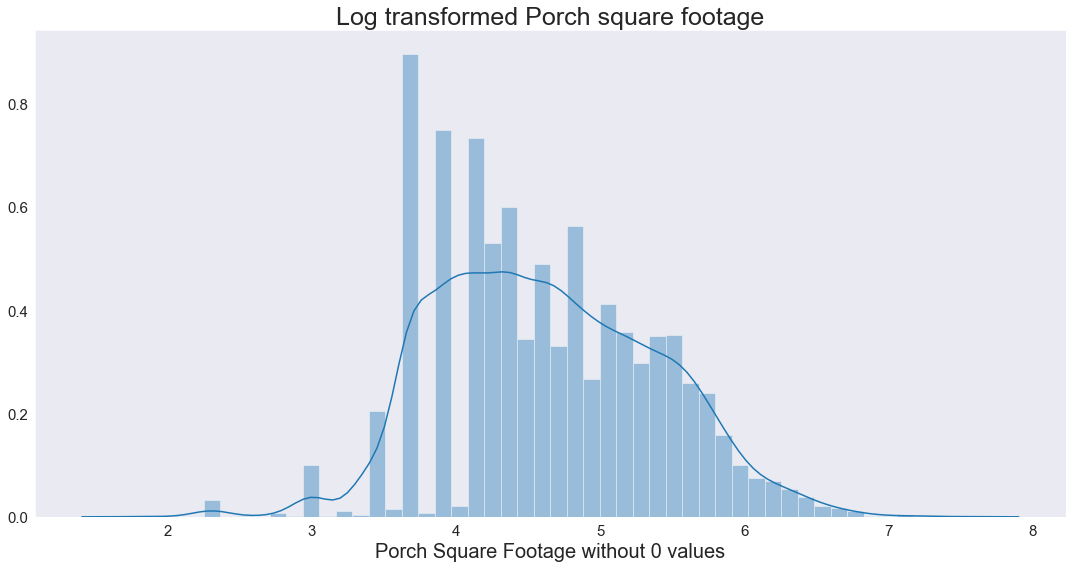

In [56]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Log transformed Porch square footage', fontsize = 25)
sns.distplot(np.log(has_porch_sf_df.sqftporch), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage without 0 values', fontsize = 20)
plt.tight_layout()

Think makes our porch data some what normal.  However, we won't be able to model with this data because it significantly cuts down our data since there are only 9402 homes with a porch, we'd be reducing our model's dataset down to 9402 entries and wouldn't be considering any homes without a porch.  We could try modeling the original log-transformed porch data instead and just see what happens to our model.

Let's create a new column in our new dataframe with the square root transformed porch sizes so we can use it in our model later.

In [94]:
new_df['sqrt_porch_size'] = np.sqrt(new_df.sqftporch)

In [96]:
new_df.drop('log_porch_size', axis = 1, inplace = True)

In [97]:
new_df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,twnshp_26,z_twnshp_20,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26,sqrt_totlivingsqft,sqrt_porch_size
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,1.950743,-0.484802,51.672043,9.486833
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,55.946403,7.071068
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,38.340579,7.071068
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,44.944410,0.100000
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,-0.127128,-0.35385,-0.369899,-0.419483,1.973505,-0.512597,-0.484802,47.222876,0.100000


# Deck Square Footage

Let's now investigate in the same way the deck square footage feature:

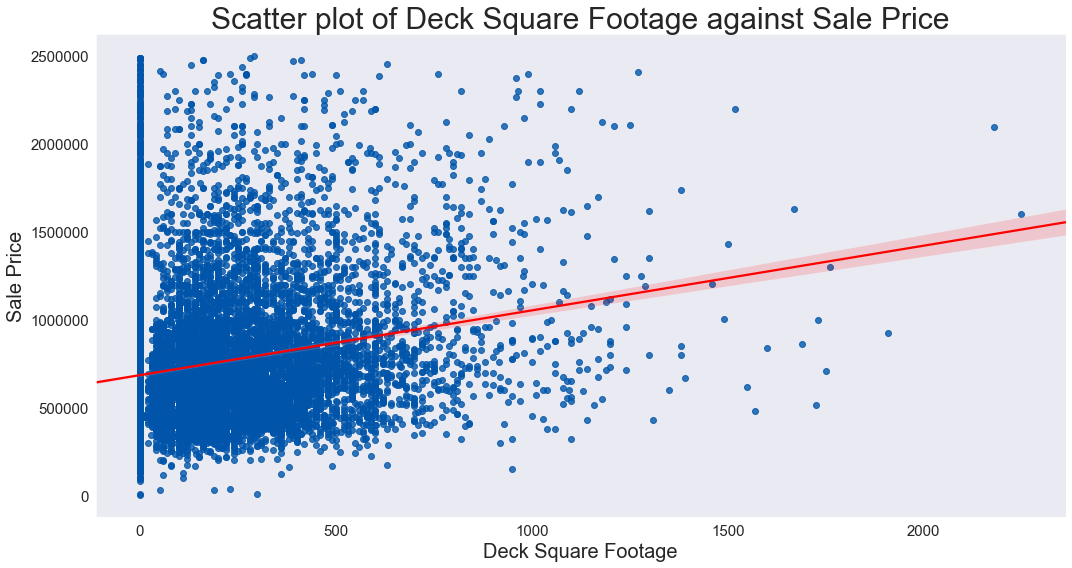

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeetdeck', y = 'saleprice', 
            data = new_df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Deck Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

We have similar issues has we had with porch that the 0 sqft values are throwing of the linearity.  But it is still a fairly linear relationship with Sale Price.  We don't seem to have any extreme outliers in this case either. 

### Compare Average Sale Prices

In [73]:
# create a binary column for 'has deck vs no deck'
new_df['has_deck'] = np.where(new_df['squarefeetdeck'] > 0, 'yes', 'no')

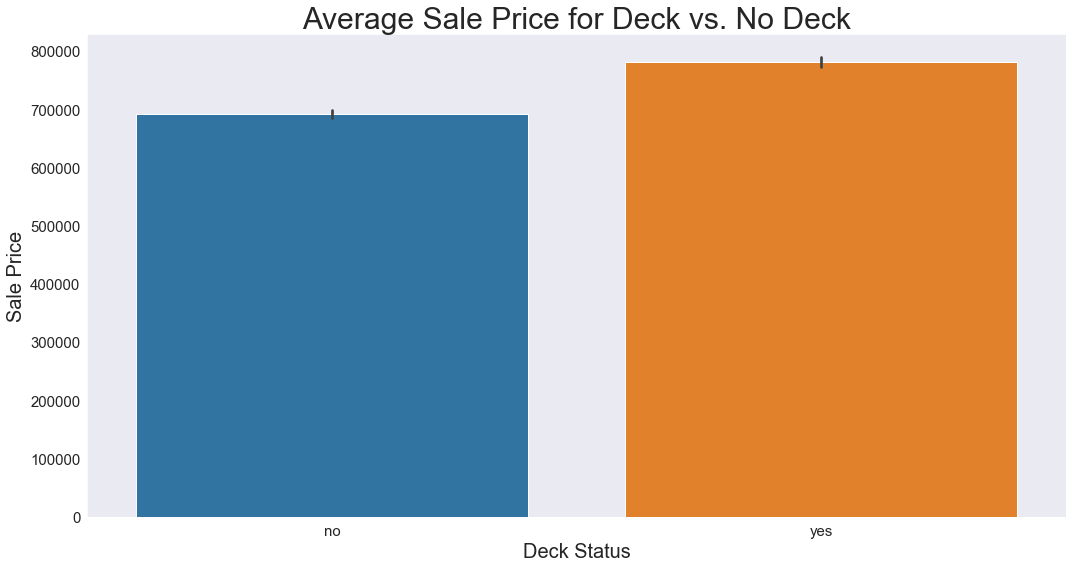

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = "has_deck", y = "saleprice", data = new_df)
ax.set_title('Average Sale Price for Deck vs. No Deck', fontsize = 30)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Deck Status', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [75]:
new_df.groupby(['has_deck'])['saleprice'].mean()

has_deck
no     692097.200905
yes    781340.297761
Name: saleprice, dtype: float64

So we can see here that the average sale price for houses with a deck are also higher than those without - similar to porch.  We can see above the mean sale prices for each category above.

### View Deck sqft Distribution

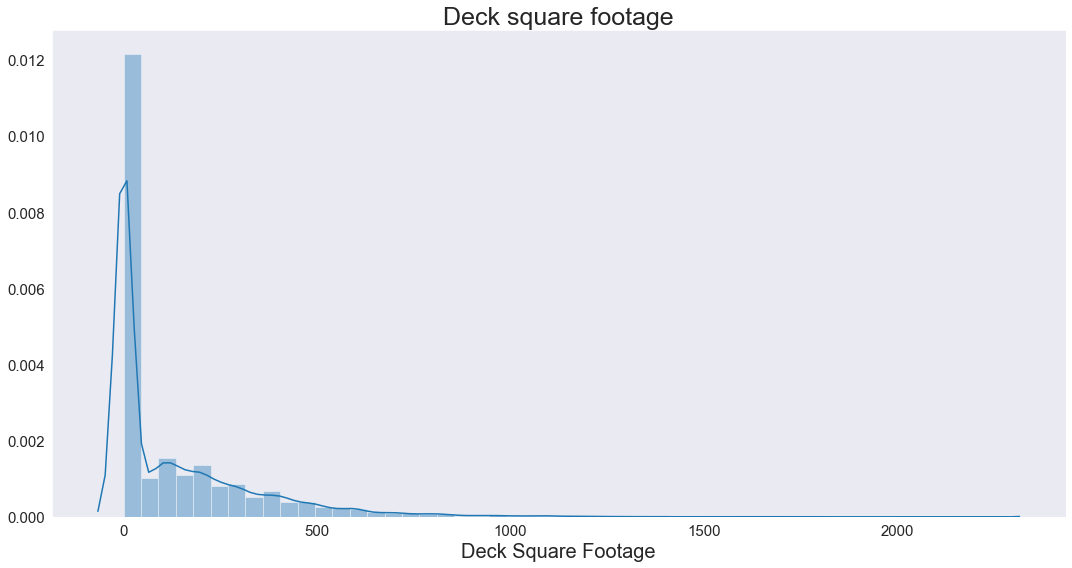

In [98]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Deck square footage', fontsize = 25)
sns.distplot(new_df.squarefeetdeck, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.tight_layout()

As expected, this is right skewed again.  We won't be able to use a log transformation due to the 0 data so we'll try a square root transformation again as we did with the porch:

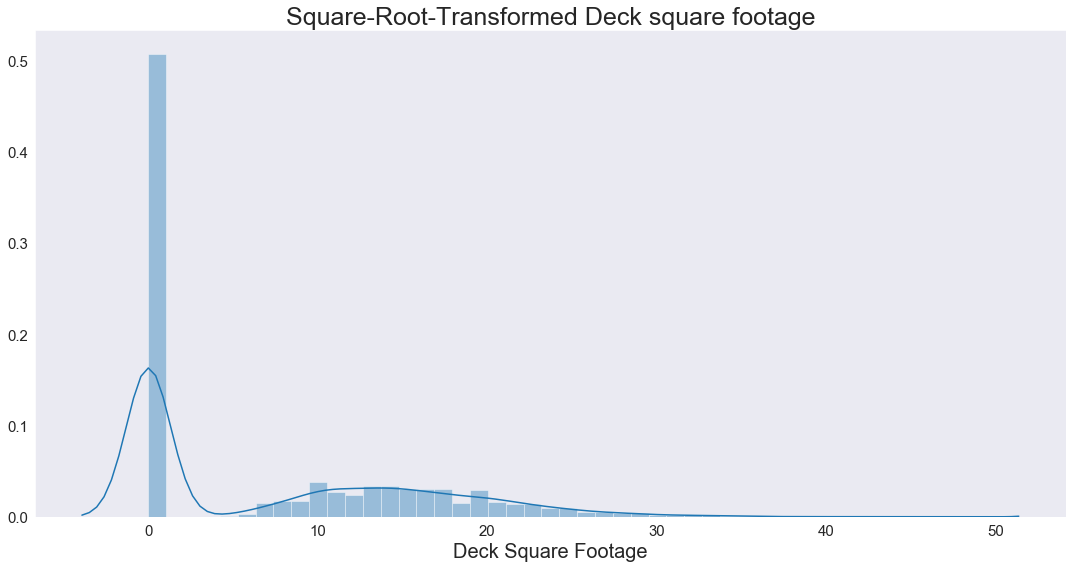

In [99]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square-Root-Transformed Deck square footage', fontsize = 25)
sns.distplot(np.sqrt(new_df.squarefeetdeck), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.tight_layout()

Once again this is being thrown off by the 0 values.  I will create a column for this data just in case we want to test it in our model.

In [100]:
new_df['sqrt_deck_size'] = np.sqrt(new_df.squarefeetdeck)

In [101]:
new_df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_twnshp_20,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26,sqrt_totlivingsqft,sqrt_porch_size,sqrt_deck_size
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,1.950743,-0.484802,51.672043,9.486833,0.000000
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,55.946403,7.071068,9.486833
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,38.340579,7.071068,20.248457
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,44.944410,0.100000,16.124515
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,-0.127128,-0.35385,-0.369899,-0.419483,1.973505,-0.512597,-0.484802,47.222876,0.100000,17.606817


# Total Bathroom Count

### Linearity:

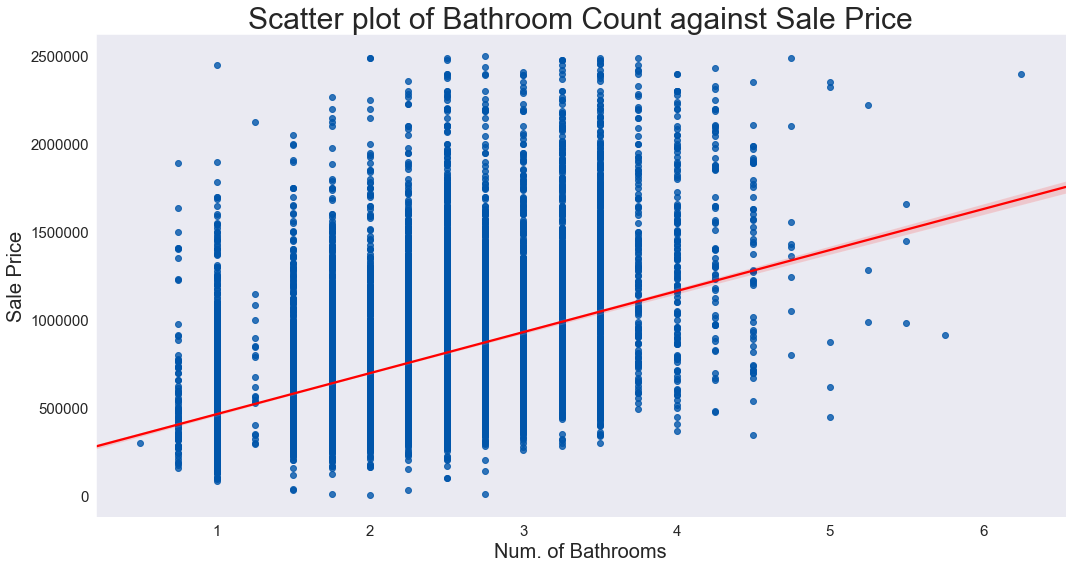

In [103]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'bathtotcount', y = 'saleprice', 
            data = new_df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Bathroom Count against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Num. of Bathrooms', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

This seems fairly linear as expected.

### View Bathroom Count Distribution:

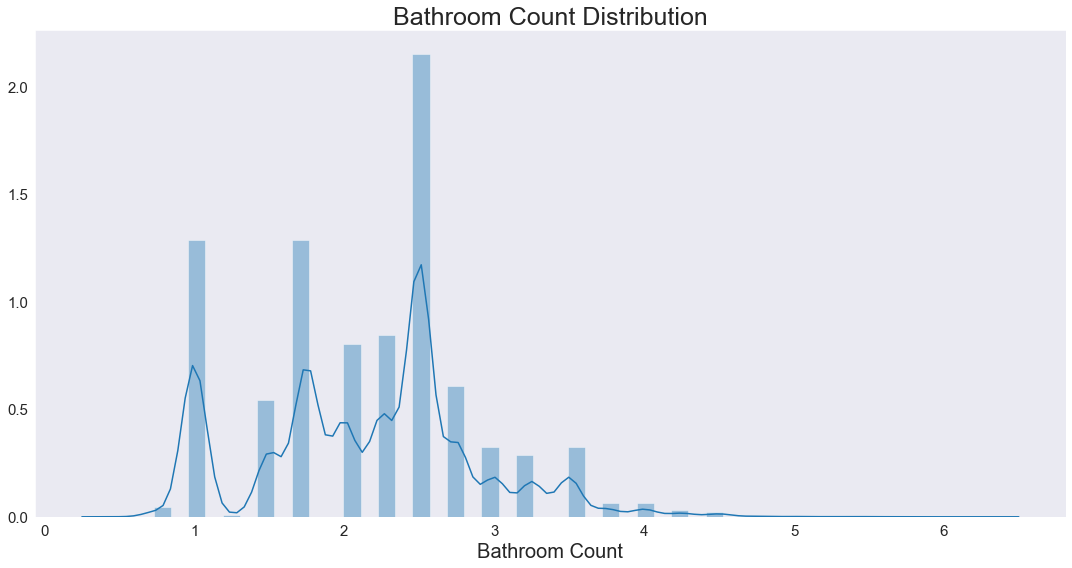

In [104]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Bathroom Count Distribution', fontsize = 25)
sns.distplot(new_df.bathtotcount, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Bathroom Count', fontsize = 20)
plt.tight_layout()

This data looks somewhat normal but is multimodal and seems more right skewed.  Let's see what a log transformation would do.  This is valid since we removed all entries with 0 bathrooms. 

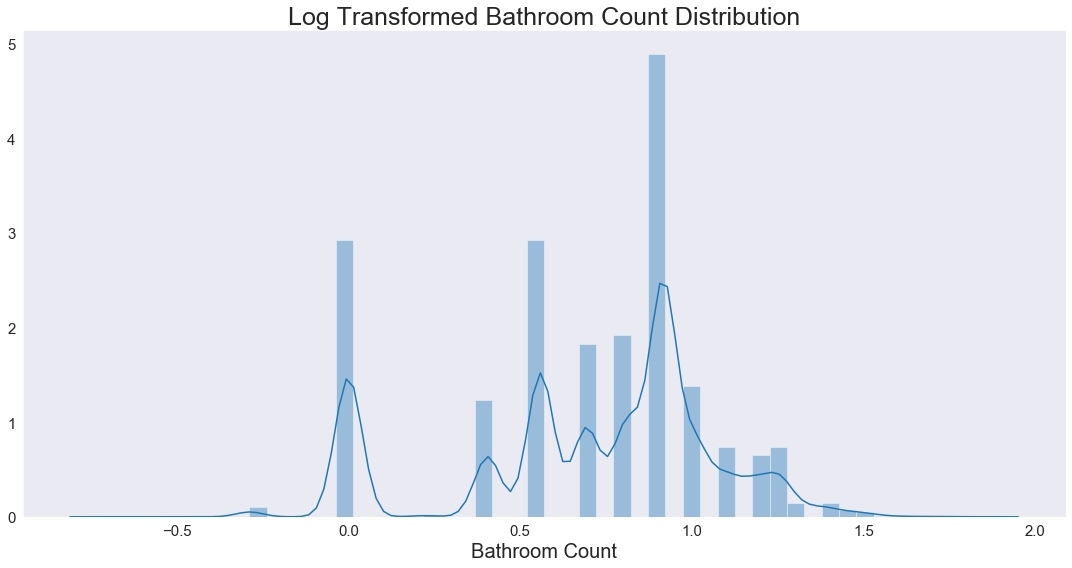

In [105]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Log Transformed Bathroom Count Distribution', fontsize = 25)
sns.distplot(np.log(new_df.bathtotcount), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Bathroom Count', fontsize = 20)
plt.tight_layout()

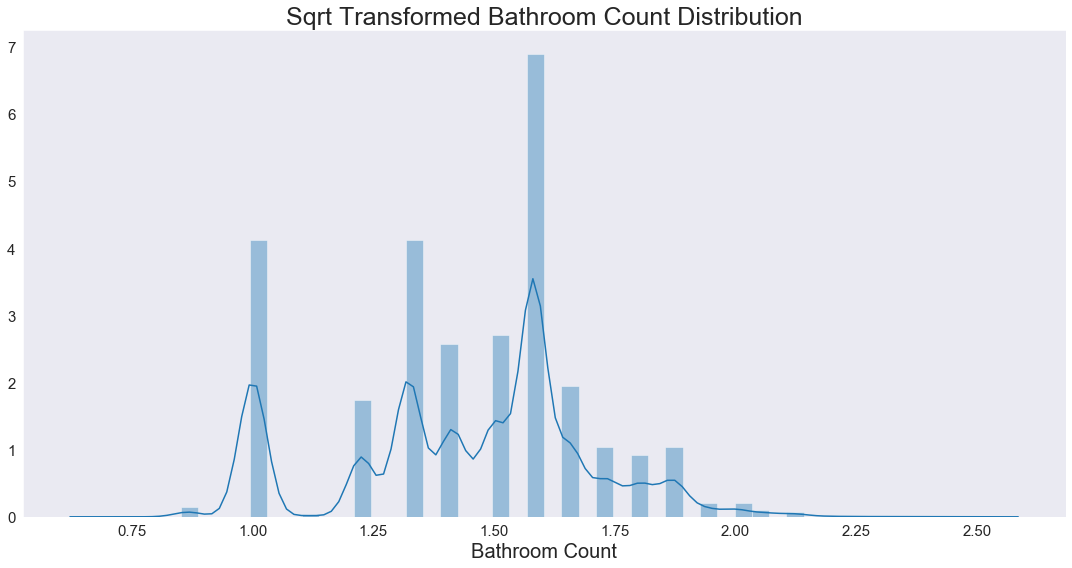

In [111]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Sqrt Transformed Bathroom Count Distribution', fontsize = 25)
sns.distplot(np.sqrt(new_df.bathtotcount), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Bathroom Count', fontsize = 20)
plt.tight_layout()

Neither of these transformations appear to have much impact so we will use the data we have still.

# Future Models

See notebook `model7_lc` where I re-do model 14 using the transformed data to see if it helps our assumptions.

In [113]:
# dataframe without porch outlier and new transformed columns
new_df.to_csv('../leana_m5')